# Batch Normalization

In [1]:
from sklearn.datasets import load_digits

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2024-07-30 03:33:10.830576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load dataset
digits = load_digits()
digits_data = digits['data']
digits_target = digits['target']

In [3]:
print(f'8x8 Pixel Data:\n{digits_data}')
print(f'8x8 Pixel Dataset Length: {len(digits_data)}')
print(f'First row of 8x8 Pixel Dataset: {(digits_data[0])}')
print()
print(f'Target Variable:\n {digits_target}')
print(f'Target Variable Dataset Length: {len(digits_target)}')
print(f'First row of Target Variable Dataset: {(digits_target[0])}')

8x8 Pixel Data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
8x8 Pixel Dataset Length: 1797
First row of 8x8 Pixel Dataset: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Target Variable:
 [0 1 2 ... 8 9 8]
Target Variable Dataset Length: 1797
First row of Target Variable Dataset: 0


In [4]:
print(f'Current target variable dataset shape: {digits_target.shape}')
print(f'First 10 entries:\n {digits_target[:10]}')
print()
# reshape target variable to a 2d array
digits_target_reshaped = digits_target.reshape(-1, 1)
print(f'Target variable dataset shape after reshape: {digits_target_reshaped.shape}')
print(f'First 10 entries after reshape:\n {digits_target_reshaped[:10]}')

Current target variable dataset shape: (1797,)
First 10 entries:
 [0 1 2 3 4 5 6 7 8 9]

Target variable dataset shape after reshape: (1797, 1)
First 10 entries after reshape:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [5]:
# initialize onehotencoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# fit and transform the target variable
digits_target_onehot = onehot_encoder.fit_transform(digits_target_reshaped)
print(f'Target Variable shape after one-hot encoding: {digits_target_onehot.shape}')
print(f'First 5 entries after one-hot encoding:\n {digits_target_onehot[:5]}')

Target Variable shape after one-hot encoding: (1797, 10)
First 5 entries after one-hot encoding:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
# build standard model without batch normalization
standard_model = Sequential()

# add an input shape that takes the total no of pixels for each 8x8 image
standard_model.add(Input(shape=(64,)))

# add a dense layer of 16 neurons with `relu` activation
standard_model.add(Dense(16, activation='relu'))

# add dense layer of 10 neurons (one per target class) and softmax
standard_model.add(Dense(10, activation='softmax'))

# compile model
standard_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# build deep neural network
batchnorm_model = Sequential()

# add an input shape that takes the total no of pixels for each 8x8 image
batchnorm_model.add(Input(shape=(64,)))

batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# compile model with gradient descent (with momentum) optimizer
batchnorm_model.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [8]:
X = digits_data
y = digits_target_onehot

# split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)

# further split X_train_val into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, 
                                                  y_train_val,
                                                  test_size=0.2,
                                                  random_state=42)


h1_callback = standard_model.fit(X_train,
                       y_train,
                       epochs=60,
                       validation_data=[X_val, y_val],
                       verbose=1)

h2_callback = batchnorm_model.fit(X_train,
                       y_train,
                       epochs=60,
                       validation_data=[X_val, y_val],
                       verbose=1)


# evaluate on test set
test_loss_standard_model, test_accuracy_standard_model = standard_model.evaluate(X_test,
                                                                                 y_test)
print(f'Standard Model Test accuracy: {test_accuracy_standard_model: .4f}')

test_loss_batchnorm_model, test_accuracy_batchnorm_model = batchnorm_model.evaluate(X_test,
                                                                                    y_test)
print(f'Batch Normalization Model Test accuracy: {test_accuracy_batchnorm_model: .4f}')


Epoch 1/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2468 - loss: 10.1257 - val_accuracy: 0.2465 - val_loss: 5.6763
Epoch 2/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2889 - loss: 5.0504 - val_accuracy: 0.3368 - val_loss: 3.0857
Epoch 3/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3462 - loss: 2.9404 - val_accuracy: 0.3924 - val_loss: 1.9944
Epoch 4/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 1.8586 - val_accuracy: 0.4757 - val_loss: 1.4486
Epoch 5/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 1.3871 - val_accuracy: 0.6007 - val_loss: 1.1345
Epoch 6/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6155 - loss: 1.1378 - val_accuracy: 0.6806 - val_loss: 0.9539
Epoch 7/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6978 - loss: 0.8576 - val_accuracy: 0.7465 - val_loss: 0.7941
Epoch 8/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.7165 - val_accuracy: 0.7465 - val_loss

In [9]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

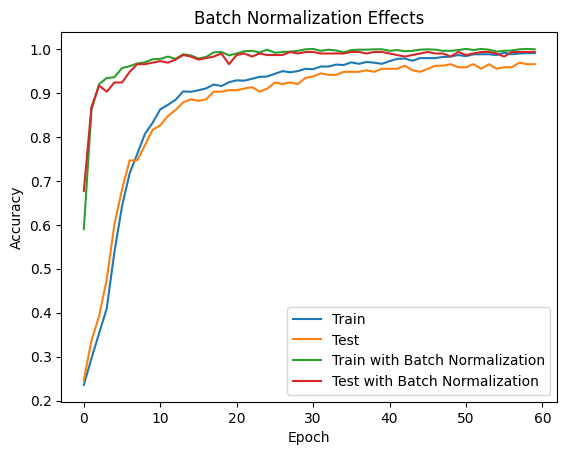

In [10]:
compare_histories_acc(h1_callback, h2_callback)

From here we can see that batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.